<img style="float: left; margin: 30px 15px 15px 15px;" src="https://pngimage.net/wp-content/uploads/2018/06/logo-iteso-png-5.png" width="300" height="500" /> 
    
    
### <font color='navy'> Simulación de procesos financieros. 

**Nombres:** Hanz Karim Peña Hernandez y Enrique Jair Rodriguez Orozco.

**Fecha:** 10 de Marzo del 2023.

**Expediente** : 727232 y 727454.
**Profesor:** Oscar David Jaramillo Zuluaga.
    
**Link Github**: 

# Tarea 4: Clase 9 y 10

### Código de solución estudiante 1

>### <font color ='red'> **Tarea 4** 
    
> Para las siguiente dos funciones, genere muestres aleatorias que distribuyan según la función dada usando el método de la transformada inversa y grafique el histograma de 1000 muestras generadas con el método de la transformada inversa y compárela con el función $f(x)$ **(recuerde que $f(x)$ es la distribución de probabilidad y $F(x)$ es la distribución de probabilidad acumulada)** [ver este enlace para más información](https://es.wikipedia.org/wiki/Funci%C3%B3n_de_distribuci%C3%B3n). Este procedimiento se realiza con el fín de validar que el procedimiento y los resultados son correctos.
    
> 1. Generación variable aleatoria continua
>El tiempo en el cual un movimiento browniano se mantiene sobre su punto máximo en el intervalo [0,1] tiene una distribución
>$$F(x)=\frac{2}{\pi}\sin^{-1}(\sqrt x),\quad 0\leq x\leq 1$$ </font>

> 2. Generación variable aleatoria Discreta
> La distribución binomial modela el número de éxitos de n ensayos independientes donde hay una probabilidad p de éxito en cada ensayo.
> Generar una variable aletoria binomial con parámetros $n=10$ y $p=0.7$. Recordar que $$X\sim binomial(n,p) \longrightarrow p_i=P(X=i)=\frac{n!}{i!(n-i)!}p^i(1-p)^{n-i},\quad i=0,1,\cdots,n$$
> Por propiedades de la operación factorial la anterior $p_i$ se puede escribir como:
> $$p_{i+1}=\frac{n-i}{i+1}\frac{p}{1-p} p_i $$

> **Nota:** Por notación recuerde que para el caso continuo $f(x)$ es la distribución de probabilidad (PDF), mientras $F(x)$ corresponde a la distribución de probabilidad acumulada (CDF). Para el caso discreto, $P(X=i)$ corresponde a su distribución de probabilidad (PMF) y $ F_{X}(x)=\operatorname {P} (X\leq x)=\sum _{x_{i}\leq x}\operatorname {P} (X=x_{i})=\sum _{x_{i}\leq x}p(x_{i})$, corresponde a su distribución de probabilidad acumulada (CDF).


> ## <font color ='red'>Tarea 4
Seguir un procedimiento similar al mostrado cuando se generó una distribución binomial, pero en esta caso genere un código que genere variables aletorias Poisson cuya función de distribución de probabilidad esta dada por:
>$$P(k,\lambda)=\frac{e^{-\lambda}(\lambda)^k}{k!}$$
    
> Demuestre matemáticamente que 
> $$P(k+1)=\frac{\lambda}{k+1}P(k)$$
> y a partir de esta relación genere variables aletorias que distribuyen poisson usando el método de la transformada inversa.

Enlace: https://es.wikipedia.org/wiki/Distribuci%C3%B3n_de_Poisson

### Ejemplo binomial: 
La distribución binomial modela el número de éxitos de n ensayos independientes donde hay una probabilidad p de éxito en cada ensayo.

Generar una variable aletoria binomial con parámetros $n=10$ y $p=0.7$. Recordar que
$$X\sim binomial(n,p) \longrightarrow p_i=P(X=i)=\frac{n!}{i!(n-i)!}p^i(1-p)^{n-i},\quad i=0,1,\cdots,n$$
> ## <font color ='red'>Tarea 4: Demostrar la validez de la siguiente ecuación
>$$p_{i+1}=\frac{n-i}{i+1}\frac{p}{1-p} p_i \longrightarrow \text{Hablar de las ventajas que sea recursiva}$$

$
\begin{aligned}
\frac{p_{k+1}}{p_k}& = \frac{e^{-\lambda}(\lambda)^k}{k!} \\
& = \frac{e^{-\lambda}(\lambda)^k}{k!}
\end{aligned}
$

Código de solución estudiante 2

In [10]:
# Código de solución estudiante 2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

$$F(x)=\frac{2}{\pi}\sin^{-1}(\sqrt x)$$

$$\frac{2}{\pi}\sin^{-1}(\sqrt x)=U$$

$$\sqrt x=\sin(\frac{\pi}{2}U)$$

$$x=\sin^2(\frac{\pi}{2}U)$$

$$f(x)=\frac{1}{\pi\sqrt{x}\sqrt{1-x}}$$

In [36]:
def ejer1acum(N):
    return (np.sin((np.pi/2)*np.random.random(N)))**2

f = lambda x: 1/(np.pi*np.sqrt(x)*np.sqrt(1-x))

0.49113668223203305


<ipython-input-36-5e78c3719113>:4: RuntimeWarning: divide by zero encountered in double_scalars
  f = lambda x: 1/(np.pi*np.sqrt(x)*np.sqrt(1-x))


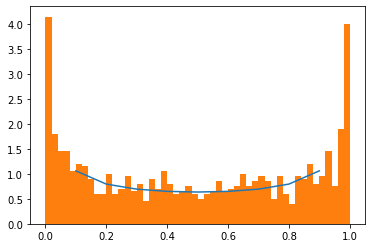

In [43]:
N = 1000
x_tarea = ejer1acum(N)
x = np.arange(0, 1.1, 0.1)
plt.plot(x, [f(n) for n in x])
plt.hist(x_tarea,bins = 50,density=True)
print(np.mean(x_tarea))
plt.show()



<ipython-input-36-5e78c3719113>:4: RuntimeWarning: divide by zero encountered in double_scalars
  f = lambda x: 1/(np.pi*np.sqrt(x)*np.sqrt(1-x))


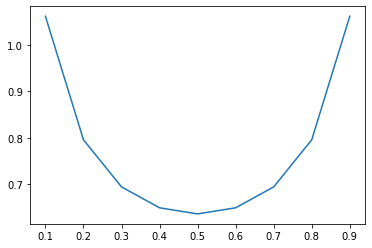

In [44]:
x = np.arange(0, 1.1, 0.1)
plt.plot(x, [f(n) for n in x])

In [27]:

def Gen_distr_discreta(p_acum: 'P.Acumulada de la distribución a generar',
                       indices: 'valores reales a generar aleatoriamente',
                       N: 'cantidad de números aleatorios a generar'):
    
    U =np.random.rand(N)

    rand2reales = {i: idx for i, idx in enumerate(indices)}

    y = pd.Series([sum([1 for p in p_acum if p < ui]) for ui in U]).map(rand2reales)

    return y

def plot_histogram_discrete(distribucion:'señal de varibles aleatorias de un distribución DISCRETA dada',
                            label:'label del legend a aparecer en el gráfica',
                            densidad:'por defecto regresa el histograma en densidad'=True):
    plt.figure(figsize=[10,4])
    y, x = np.histogram(distribucion, bins=len(set(distribucion)), density=densidad) 
    plt.bar(x[1:], y, label=label)
    plt.legend()
    plt.show()
    

def P_acum_Binomial_o(n,p):
    Pr = np.zeros(n)
    Pr[0] = (1-p)**n
    def pr(i):
        nonlocal Pr
        c  = p/(1-p)
        Pr[i+1]=(c*(n-i)/(i+1))*Pr[i]
        
    [pr(i) for i in range(n-1)]
    return np.cumsum(Pr)

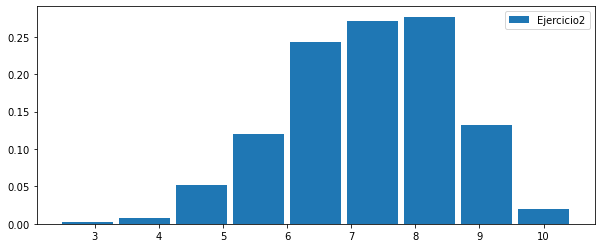

In [28]:
n = 10
p = 0.7
N = 1000

p_acum = P_acum_Binomial_o(n,p)

d_binomial = Gen_distr_discreta(p_acum, np.arange(0, n+1), N)

plot_histogram_discrete(d_binomial, 'Ejercicio2')